# Churn model using Random Forest. 
#@taroonreddy.com

In [68]:
#taroonreddy.com
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [69]:
# Load Data
df = pd.read_csv('E:/Data Science _TR/Datasets/Telco-Customer-Churn.csv')

In [70]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We observe SeniorCitizen Should be categorical variables, but comes as int64. Will convert it back to categorical

In [72]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [73]:
#Convert to Categorical variable
df.SeniorCitizen= df.SeniorCitizen.apply(lambda x : 'No' if x == 0 else 'Yes')


In [74]:
#Check Type after conversion
df.SeniorCitizen.unique()

array(['No', 'Yes'], dtype=object)

Another Observation that TotalCharges is continues variables and comes as object. Will convert to numeric format

In [75]:
df['TotalCharges_new']= pd.to_numeric(df.TotalCharges,errors='coerce')

In [76]:
#Check NULL values after the conversion
df.loc[pd.isna(df.TotalCharges_new),'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [77]:
#Fill 11 Missing values from the original column
TotalCharges_Missing=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]
df.loc[pd.isnull(df.TotalCharges_new),'TotalCharges_new']=TotalCharges_Missing


In [78]:
#We are good to replace old columns with the new numerical column
df.TotalCharges=df.TotalCharges_new
df.drop(['customerID','TotalCharges_new'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Now will check all categorical variables levels

In [16]:
df.dtypes=='object'
categorical_var=[i for i in df.columns if df[i].dtypes=='object']
for z in categorical_var:
    print(df[z].name,':',df[z].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


There are some variables has value 'No Internet Service' that equivalent to 'No'. Will merge both values

In [79]:
Dual_features= ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Dual_features:
    df[i]=df[i].apply(lambda x: 'No' if x=='No internet service' else x)
#Remove No Phones Service that equivilent to No for MultipleLines
df.MultipleLines=df.MultipleLines.apply(lambda x: 'No' if x=='No phone service' else x)


In [80]:
#Check levels or all Categorical Variables
for z in [i for i in df.columns if df[i].dtypes=='object']:
    print(df[z].name,':',df[z].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# Data Analysis and Visualizations

First will analyze continues variables against Churn variable

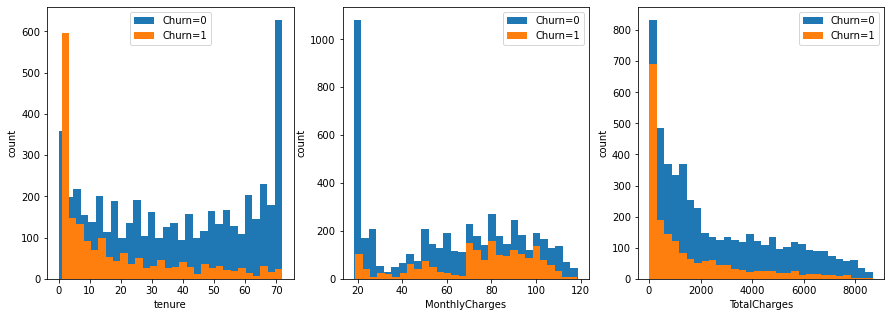

In [81]:
continues_var=[i for i in df.columns if df[i].dtypes !='object']
fig , ax = plt.subplots(1,3,figsize=(15,5))
for i , x in enumerate(continues_var):
    ax[i].hist(df[x][df.Churn=='No'],label='Churn=0',bins=30)
    ax[i].hist(df[x][df.Churn=='Yes'],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

We can see a real impact of all continues variables on Churn specially Tenue(Loyal Customers Stay)

Will Check now Box Plot for more explorations

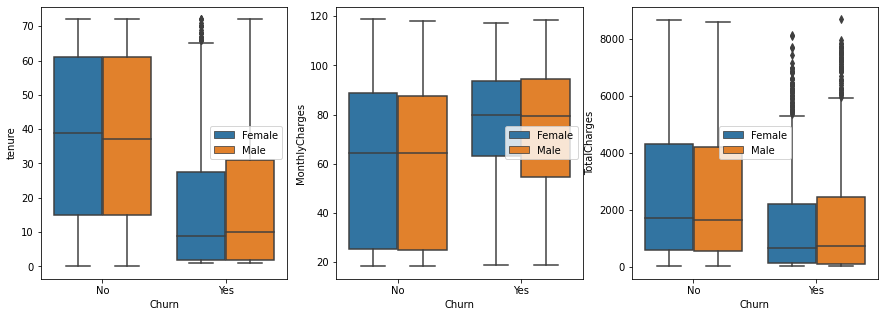

In [82]:
fig , ax = plt.subplots(1,3,figsize=(15,5))
for i , xi in enumerate(continues_var):
    sns.boxplot(x=df.Churn,y=df[xi],ax=ax[i],hue=df.gender)
    ax[i].set(xlabel='Churn',ylabel=xi)
    ax[i].legend()


Now it is more clear the impact of Continues Variables on Churn , We can see minimal impact of Gender

Now will convert to check regarding Categorical Variables

In [83]:
#Remove Churn Variable for Analysis
categorical_var_NoChurn= categorical_var[:-1]

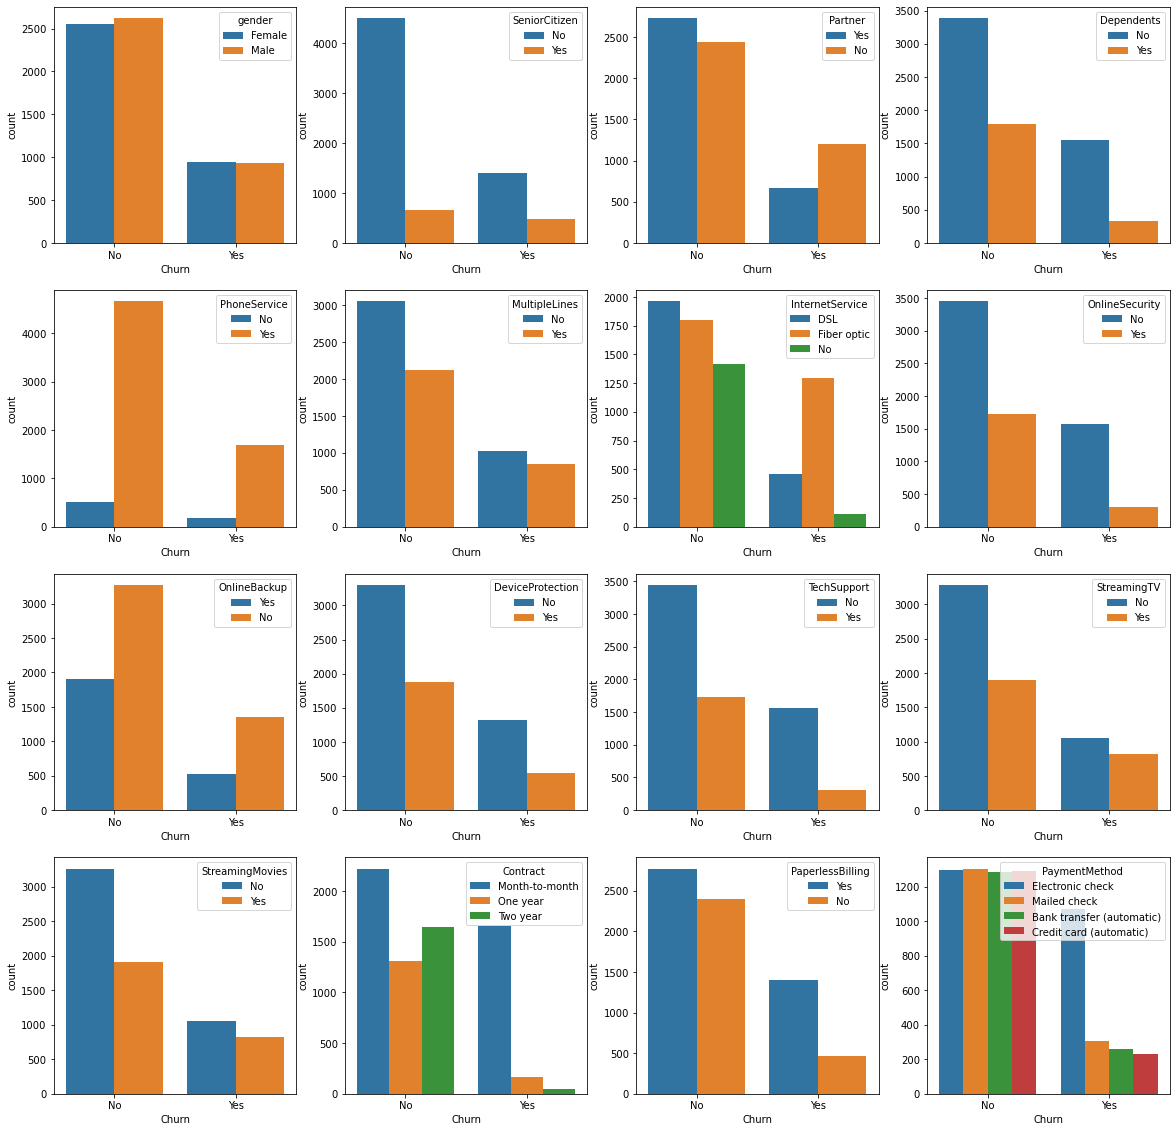

In [84]:
#Count Plot all Categorical Variables with Hue Churn
fig , ax = plt.subplots(4,4,figsize=(20,20))
for axi , var in zip(ax.flat,categorical_var_NoChurn):
    sns.countplot(x=df.Churn,hue=df[var],ax=axi)

- We cannot see a real Impact of gender
- Seniors are less loyalty
- Partners are more loyal
- Dependents are more loyal
- Customers does not have multiplelines are more loyal
- Customer are not happy with Optical Fiber and Leaving with rate of other internet services
- Customers with month-to-month contract are more willing to leave than people with contracts
- Paperless customers are more willing to leave that paper billing
- Customer pay using electronic check is more willing to leave

I Can conclude that mostly customers are suffering from the services , and specially advances customers who are using paperless billing and electronic payment. Some variables has no real impact of Churn but as a first trial for the model i will include all variables, should remove variables in the tuning phase

## Categorical Variables Encoding

For logistics variables(2 classes) will encode using Label Encoder , For Variables has more than 2 classes will use get_dummies function 

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= label_encoder.fit_transform(df[x])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [86]:
#Check Variables after Encoding
[[x, df[x].unique()] for x in [i for i in df.columns if len(df[i].unique())<10]]

[['gender', array([0, 1])],
 ['SeniorCitizen', array([0, 1])],
 ['Partner', array([1, 0])],
 ['Dependents', array([0, 1])],
 ['PhoneService', array([0, 1])],
 ['MultipleLines', array([0, 1])],
 ['InternetService', array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 ['OnlineSecurity', array([0, 1])],
 ['OnlineBackup', array([1, 0])],
 ['DeviceProtection', array([0, 1])],
 ['TechSupport', array([0, 1])],
 ['StreamingTV', array([0, 1])],
 ['StreamingMovies', array([0, 1])],
 ['Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object)],
 ['PaperlessBilling', array([1, 0])],
 ['PaymentMethod',
  array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
         'Credit card (automatic)'], dtype=object)],
 ['Churn', array([0, 1])]]

In [87]:
#Encode Variables with more than 2 Classes
df= pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)
  

In [88]:
#Check Variables after Encoding
[[x, df[x].unique()] for x in [i for i in df.columns if len(df[i].unique())<10]]

[['gender', array([0, 1])],
 ['SeniorCitizen', array([0, 1])],
 ['Partner', array([1, 0])],
 ['Dependents', array([0, 1])],
 ['PhoneService', array([0, 1])],
 ['MultipleLines', array([0, 1])],
 ['OnlineSecurity', array([0, 1])],
 ['OnlineBackup', array([1, 0])],
 ['DeviceProtection', array([0, 1])],
 ['TechSupport', array([0, 1])],
 ['StreamingTV', array([0, 1])],
 ['StreamingMovies', array([0, 1])],
 ['PaperlessBilling', array([1, 0])],
 ['Churn', array([0, 1])],
 ['InternetService_Fiber optic', array([0, 1], dtype=uint8)],
 ['InternetService_No', array([0, 1], dtype=uint8)],
 ['Contract_One year', array([0, 1], dtype=uint8)],
 ['Contract_Two year', array([0, 1], dtype=uint8)],
 ['PaymentMethod_Credit card (automatic)', array([0, 1], dtype=uint8)],
 ['PaymentMethod_Electronic check', array([1, 0], dtype=uint8)],
 ['PaymentMethod_Mailed check', array([0, 1], dtype=uint8)]]

Variables Looks good now and we are ready for data splitting and scaling

# Data Scaling and Splitting

In [91]:
#Create Features DataFrame
X=df.drop('Churn',axis=1)
#Create Target Series
y=df['Churn']
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [92]:
#Scale Data
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.transform(X_test)

In [93]:
#Check Data after Scaling
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.995467,-0.435476,-0.969419,-0.656543,-0.340191,0.32585,-0.853134,-0.636816,-0.724449,1.387334,...,0.820754,-0.514314,-0.462221,-0.885697,-0.525797,-0.517280,-0.555335,1.913625,-0.709015,-0.548037
1,1.004554,2.296336,-0.969419,-0.656543,0.883210,0.32585,-0.853134,-0.636816,-0.724449,1.387334,...,-1.218392,0.017840,0.554389,-0.885697,-0.525797,1.933189,-0.555335,-0.522569,-0.709015,-0.548037
2,1.004554,-0.435476,-0.969419,-0.656543,-1.196572,-3.06890,-0.853134,-0.636816,-0.724449,1.387334,...,0.820754,-0.819594,-0.950232,-0.885697,-0.525797,-0.517280,-0.555335,-0.522569,-0.709015,1.824694
3,-0.995467,-0.435476,1.031546,-0.656543,1.168670,0.32585,-0.853134,-0.636816,-0.724449,-0.720807,...,-1.218392,-1.483535,-0.442059,-0.885697,1.901876,-0.517280,1.800714,1.913625,-0.709015,-0.548037
4,1.004554,-0.435476,-0.969419,-0.656543,-0.829552,0.32585,1.172149,-0.636816,-0.724449,-0.720807,...,0.820754,0.658427,-0.539108,1.129054,-0.525797,-0.517280,-0.555335,-0.522569,1.410407,-0.548037


# Applying ML Models

## Random Forest Model

Will start by train Random forest model using default parameters and all variables and get initial results

In [94]:
#Apply RandomForest Algorethm
random_classifier= RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
y_pred= random_classifier.predict(X_test)

In [96]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1298
           1       0.61      0.47      0.53       463

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



Text(91.68, 0.5, 'predicted label')

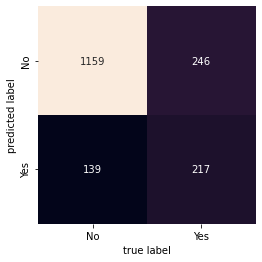

In [97]:
#Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [98]:
random_classifier.feature_importances_

array([0.02850957, 0.02166771, 0.02251845, 0.01938   , 0.18038457,
       0.00688246, 0.02096962, 0.02310816, 0.02239562, 0.01961552,
       0.02110613, 0.01940823, 0.01875909, 0.02564149, 0.17418014,
       0.18927308, 0.04461509, 0.01670005, 0.02491806, 0.03304899,
       0.01324175, 0.04136597, 0.01231023])

Result are not bad as a start. Recall, and Precision of Churn='Yes' is not that good. We need to check features importance for the next tuning

In [34]:
#get features Importances
xx= pd.Series(random_classifier.feature_importances_,index=X.columns)
xx.sort_values(ascending=False)

TotalCharges                             0.189220
MonthlyCharges                           0.181923
tenure                                   0.173162
InternetService_Fiber optic              0.042535
PaymentMethod_Electronic check           0.039414
Contract_Two year                        0.033707
gender                                   0.026791
PaperlessBilling                         0.026692
Contract_One year                        0.026200
Partner                                  0.023885
OnlineBackup                             0.022643
OnlineSecurity                           0.022601
TechSupport                              0.022090
SeniorCitizen                            0.021717
MultipleLines                            0.020878
Dependents                               0.019619
DeviceProtection                         0.018713
StreamingTV                              0.018595
StreamingMovies                          0.017899
InternetService_No                       0.017894


We need to use this list in next tuning of the model

Finally will draw ROC curve for the model

In [99]:
y_pred_proba=random_classifier.predict_proba(X_test)[:,1]

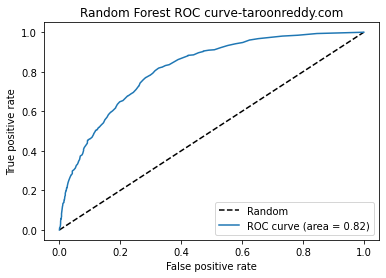

In [100]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve-taroonreddy.com')
plt.legend(loc='best')


In [102]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)



[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


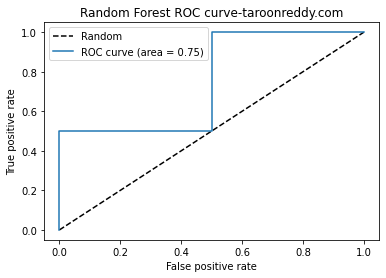

In [103]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2,)
roc_auc=auc(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve-taroonreddy.com')
plt.legend(loc='best')
